In [ ]:
# Made by:
#     Seif Eldin Mohamed Mostafa Ibraheem id:2203155
#     Isis Ashraf Helmy id:22010455
#     Farida Mohamed Hesham id:2203159

data in original form:
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice

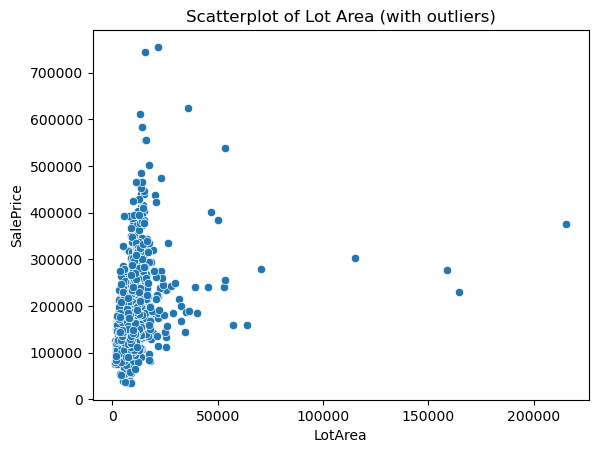

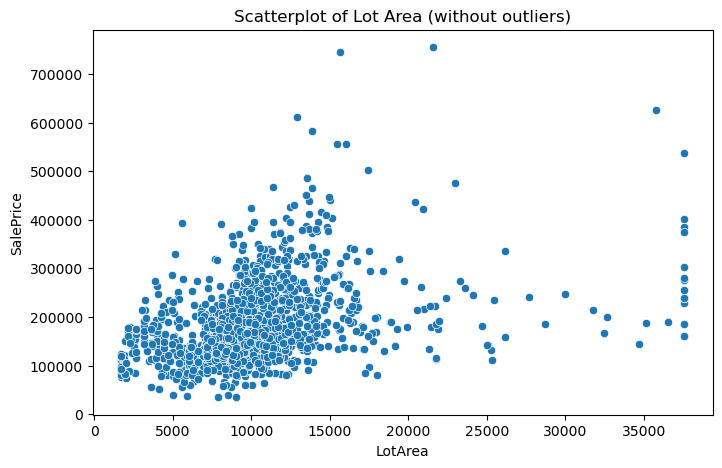

Statistic: 0.869672954082489, p-value: 3.2072044604461286e-33
The data does not follow a normal distribution (reject the null hypothesis)
t_test t-statistic: 10.794553149978595
t_test p-value: 3.462928631900291e-26
data after cleaning:
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0   8450.0   Pave      Reg         Lvl   
1   2          20       RL         80.0   9600.0   Pave      Reg         Lvl   
2   3          60       RL         68.0  11250.0   Pave      IR1         Lvl   
3   4          70       RL         60.0   9550.0   Pave      IR1         Lvl   
4   5          60       RL         84.0  14260.0   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0       

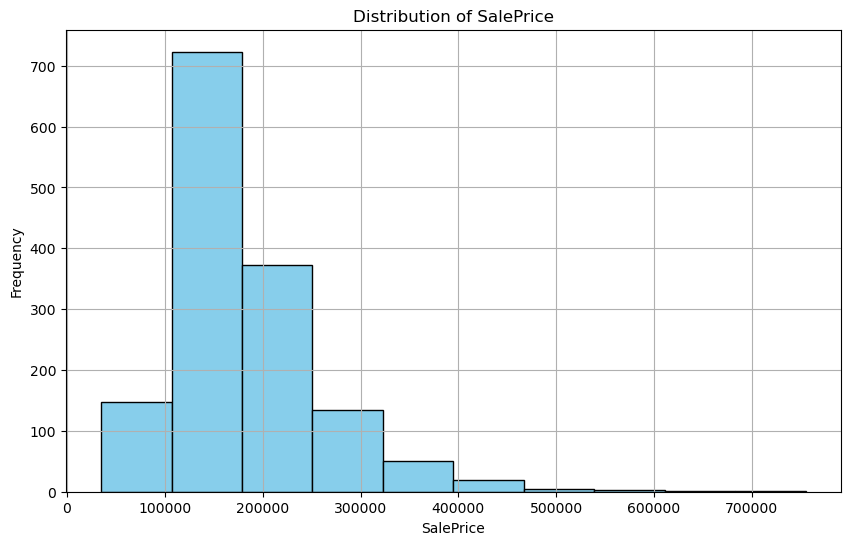

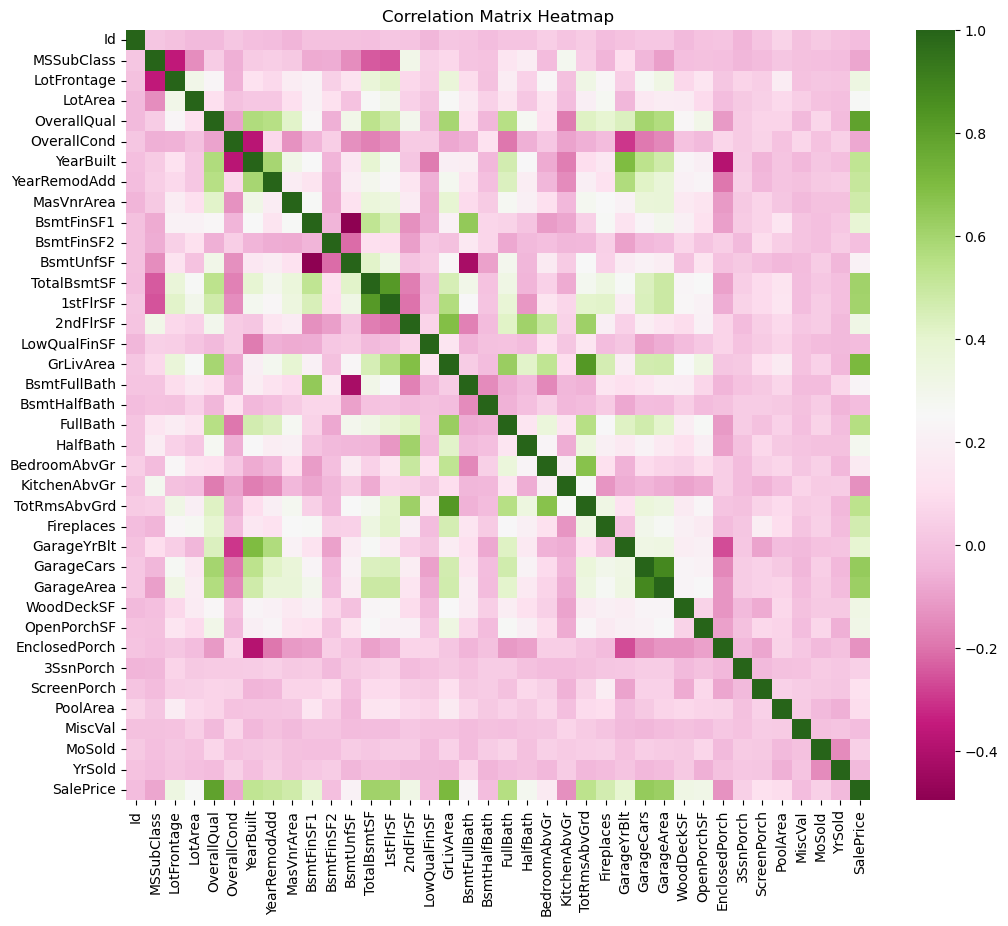

Features highly correlated with SalePrice:
SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64


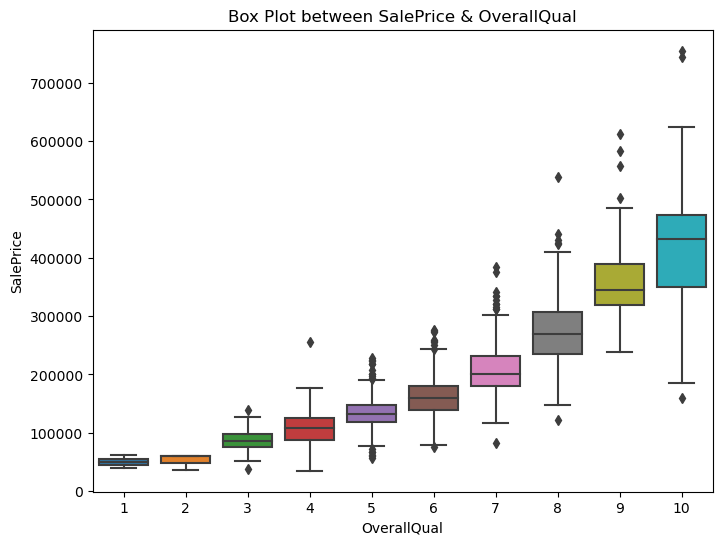

C:\Users\youssef\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


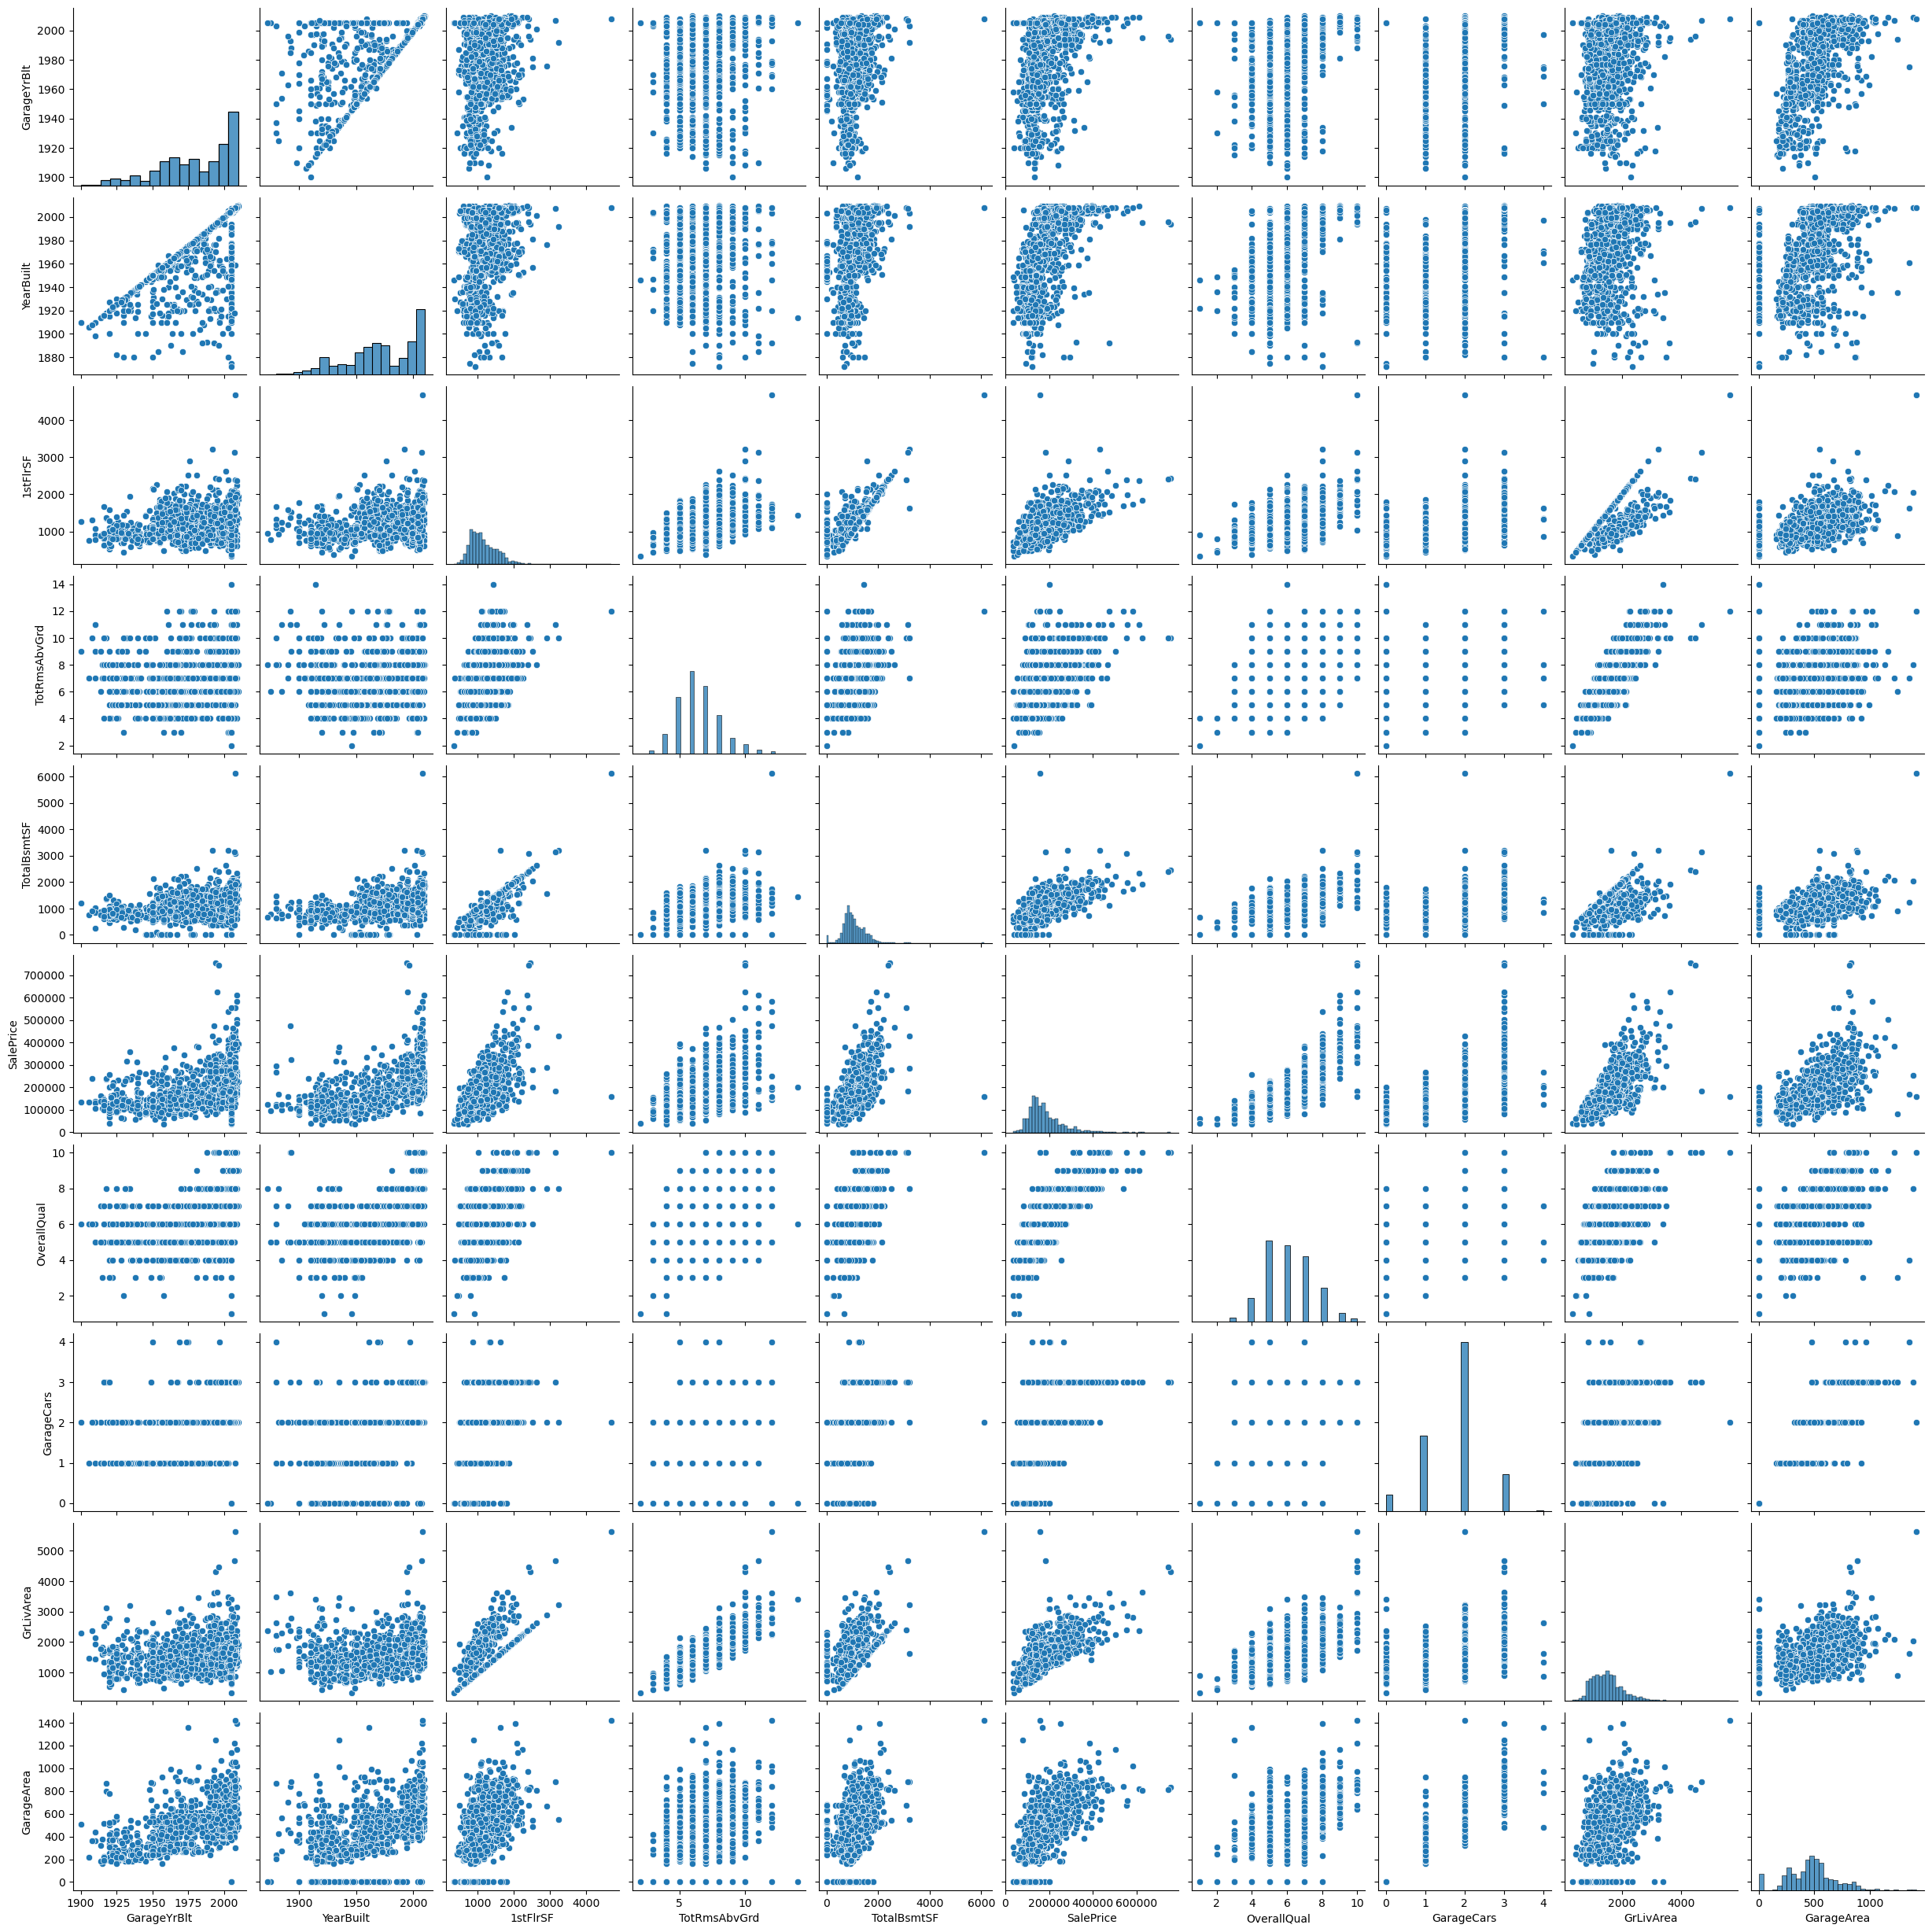

C:\Users\youssef\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



data after encoding:
    Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0   8450.0            7            5       2003   
1   2          20         80.0   9600.0            6            8       1976   
2   3          60         68.0  11250.0            7            5       2001   
3   4          70         60.0   9550.0            7            5       1915   
4   5          60         84.0  14260.0            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  SaleType_New  \
0          2003       196.0         706  ...             0.0           0.0   
1          1976         0.0         978  ...             0.0           0.0   
2          2002       162.0         486  ...             0.0           0.0   
3          1970         0.0         216  ...             0.0           0.0   
4          2000       350.0         655  ...             0.0           0.0   

   SaleType_Oth  SaleType_W

C:\Users\youssef\AppData\Local\Temp\ipykernel_3696\677929580.py:190: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
C:\Users\youssef\AppData\Local\Temp\ipykernel_3696\677929580.py:193: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['TotalBathrooms'] = data['FullBath'] + 0.5 * data['HalfBath'] + data['BsmtFullBath'] + 0.5 * data['BsmtHalfBath']
C:\Users\youssef\AppData\Local\Temp\ipykernel_3696\677929580.py:197: PerformanceWarning: DataFrame is highly 

Accuracy using RandomForestRegression Model:  88.90811301502254
KNN Accuracy:  74.42562394482704
SVM Accuracy:  89.43881393860852
After many trials we found out that the best performing model was Support Vector Machine regression method :)


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from sklearn.preprocessing import OneHotEncoder
import numpy as np

data = pd.read_csv("train.csv")

print('data in original form:\n', data.head())

missing_values = data.isnull().sum()
percentage_missing = (missing_values / len(data)) * 100

# Column(s) with the highest percentage of missing values
highest_missing_columns = percentage_missing.sort_values(ascending=False)
print('highest percentage of missing values:\n', highest_missing_columns.head(20))

# handling missing values

# dropping highest percentage columns and replacing the rest with mean or mode
data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)
data['MasVnrType'].fillna(data['MasVnrType'].mode()[0], inplace=True)
data['FireplaceQu'].fillna(data['FireplaceQu'].mode()[0], inplace=True)
data['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace=True)
data['GarageYrBlt'].fillna(data['GarageYrBlt'].mode()[0], inplace=True)
data['GarageCond'].fillna(data['GarageCond'].mode()[0], inplace=True)
data['GarageType'].fillna(data['GarageType'].mode()[0], inplace=True)
data['GarageFinish'].fillna(data['GarageFinish'].mode()[0], inplace=True)
data['GarageQual'].fillna(data['GarageQual'].mode()[0], inplace=True)
data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode(), inplace=True)
data['BsmtExposure'].fillna(data['BsmtExposure'].mode(), inplace=True)
data['BsmtQual'].fillna(data['BsmtQual'].mode(), inplace=True)
data['BsmtCond'].fillna(data['BsmtCond'].mode(), inplace=True)
data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode(), inplace=True)
data['MasVnrArea'].fillna(data['MasVnrArea'].mean(), inplace=True)
data['Electrical'].fillna(data['Electrical'].mode(), inplace=True)


# statistics to analyze numerical columns
print('descriptive statistics:\n', data.describe())

# Display correlation values with the target variable 'SalePrice'
numeric_columns = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
print('correlation values with sale price:\n', correlation_matrix['SalePrice'].sort_values(ascending=False))

# Visualize potential outliers
sns.scatterplot(x='LotArea', y='SalePrice', data=data)
plt.title('Scatterplot of Lot Area (with outliers)')
plt.show()

# handling outliers
q_low = data['LotArea'].quantile(0.01)  # 1st percentile
q_high = data['LotArea'].quantile(0.99)  # 99th percentile

data['LotArea'] = data['LotArea'].clip(lower=q_low, upper=q_high)

# Visualize the distribution after handling outliers
plt.figure(figsize=(8, 5))
sns.scatterplot(x='LotArea', y='SalePrice', data=data)
plt.title('Scatterplot of Lot Area (without outliers)')
plt.show()

#  testing if sale price follows normal distribution

# Shapiro-Wilk test for normality
if 'SalePrice' in data.columns:
    sale_price = data['SalePrice']

    # Shapiro-Wilk test for normality
    statistic, p_value = shapiro(sale_price)

    # Display the results of the test
    print(f'Statistic: {statistic}, p-value: {p_value}')

    # Set the significance level (commonly 0.05)
    alpha = 0.05

    # Check the p-value against the significance level
    if p_value > alpha:
        print("The data follows a normal distribution (fail to reject the null hypothesis)")
    else:
        print("The data does not follow a normal distribution (reject the null hypothesis)")

else:
    print("Error: 'SalePrice' column not found in the DataFrame.")

# difference between means of 'overallqual' and 'centralair'
central_air_yes = data[data['CentralAir'] == 'Y']['OverallQual']
central_air_no = data[data['CentralAir'] == 'N']['OverallQual']

# Perform t-test
t_stat, p_value_ttest = ttest_ind(central_air_yes, central_air_no)
print("t_test t-statistic:", t_stat)
print("t_test p-value:", p_value_ttest)

print('data after cleaning:\n', data.head())

# Histogram Plotting
plt.figure(figsize=(10, 6))
plt.hist(data['SalePrice'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Correlation Matrix Heatmap
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='PiYG')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Show features that are highly correlated with SalePrices
correlations = correlation_matrix['SalePrice']
sorted_correlations = correlations.abs().sort_values(ascending=False)
print(f"Features highly correlated with SalePrice:")
print(sorted_correlations.head())

# BoxPlot Between SalePrice & OverAll Qual
selected_columns = ['SalePrice', 'OverallQual']
boxplotcolumns = data[selected_columns]
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=boxplotcolumns)
plt.title('Box Plot between SalePrice & OverallQual')
plt.show()

# Pairplot
highly_correlated_pairs = (correlation_matrix.abs() > 0.7) & (correlation_matrix.abs() < 1.0)
highly_correlated_variables = []
for col in highly_correlated_pairs.columns:
    correlated_vars = list(highly_correlated_pairs.index[highly_correlated_pairs[col]])
    if correlated_vars:
        highly_correlated_variables.append(col)
        highly_correlated_variables.extend(correlated_vars)
highly_correlated_variables = list(set(highly_correlated_variables))

# Select only highly correlated variables from the DataFrame
df_highly_correlated = data[highly_correlated_variables]

# Create a pairplot
sns.pairplot(df_highly_correlated)
plt.show()

# hot encoder
categorical_cols = data.select_dtypes(include=['object']).columns
# print(categorical_cols)

encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(data[categorical_cols])

# Create a DataFrame with the encoded values
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the new DataFrame with the original DataFrame
data = pd.concat([data, encoded_df], axis=1)

# Drop the original categorical columns
data = data.drop(categorical_cols, axis=1)
print('\ndata after encoding:\n', data.head())

num_cols = data.select_dtypes(include=['number']).columns

from sklearn.preprocessing import StandardScaler
# standardscaler
ss = StandardScaler()
data[num_cols] = ss.fit_transform(data[num_cols])
print('standard scaler:\n', data[num_cols].head())

from sklearn.linear_model import Lasso

# Apply Lasso regression for feature selection
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X, y)

# Extract important features
important_features = X.columns[lasso_model.coef_ != 0]
print('most important features using lasso:\n', important_features)

# new features

# Combine square footage of basement, first and second floor to get total living area
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

# Combine the number of bathrooms in the house
data['TotalBathrooms'] = data['FullBath'] + 0.5 * data['HalfBath'] + data['BsmtFullBath'] + 0.5 * data['BsmtHalfBath']

# Combine the age of the house by subtracting the year it was built from the current year
current_year = 2023  # Update with the current year
data['HouseAge'] = current_year - data['YearBuilt']

# Combine the age of the last remodel or addition by subtracting the year it was remodeled from the current year
data['RemodelAge'] = current_year - data['YearRemodAdd']

# Create a feature indicating the total porch area
data['TotalPorchArea'] = data['OpenPorchSF'] + data['EnclosedPorch'] + data['3SsnPorch'] + data['ScreenPorch']

# Create a feature indicating the overall condition of the house
data['OverallCondition'] = data['OverallQual'] * data['OverallCond']

# Create a feature indicating the total number of rooms in the house
data['TotalRooms'] = data['TotRmsAbvGrd'] + data['BsmtFullBath'] + data['BsmtHalfBath']


from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor

# Accuracy testing using RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
print('Accuracy using RandomForestRegression Model: ', forest.score(X_test, y_test)*100)

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Calculationg accuracy from other models
# KNN
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train, y_train)
print('KNN Accuracy: ', model_knn.score(X_test, y_test)*100)
# SVM
model_svm = SVR(kernel='linear', C=1.0, gamma='scale')
model_svm.fit(X_train, y_train)
print('SVM Accuracy: ', model_svm.score(X_test, y_test)*100)

print('After many trials we found out that the best performing model was Support Vector Machine regression method :)')